In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

df

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [3]:
# Convert 'date' to datetime and extract additional features
# Convert 'date' to datetime, and specify utc=True to standardize to UTC time zone
df['date'] = pd.to_datetime(df['date'], utc=True)
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month

# Drop date column as it's no longer needed
df.drop(columns=['date'], inplace=True)

# Feature selection: we will use all columns except 'number_people' (target variable)
X = df.drop(columns=['number_people'])
y = df['number_people']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
results_df

,MSE,RMSE,R2
Linear Regression,251.675866,15.864295,0.513056
SVR,186.003812,13.638321,0.640119
Decision Tree,67.427655,8.211434,0.869541
Random Forest,40.983935,6.401870,0.920704
XGBoost,80.587378,8.977047,0.844079
Naive Bayes,2905.921042,53.906596,-4.622393
Gradient Boosting,145.077225,12.044801,0.719304
KNN,63.105849,7.943919,0.877902


In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Updated results from your model evaluation
results = {
    'Model': [
        'Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 
        'XGBoost', 'Naive Bayes', 'Gradient Boosting', 'KNN'
    ],
    'MSE': [
        251.675866, 186.003812, 66.687163, 40.976180, 
        80.587378, 2905.921042, 145.077225, 63.105849
    ],
    'RMSE': [
        15.864295, 13.638321, 8.166221, 6.401264, 
        8.977047, 53.906596, 12.044801, 7.943919
    ],
    'R2': [
        0.513056, 0.640119, 0.870973, 0.920719, 
        0.844079, -4.622393, 0.719304, 0.877902
    ]
}

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the updated results
results_df

,Model,MSE,RMSE,R2
0,Linear Regression,251.675866,15.864295,0.513056
1,SVR,186.003812,13.638321,0.640119
2,Decision Tree,66.687163,8.166221,0.870973
3,Random Forest,40.976180,6.401264,0.920719
4,XGBoost,80.587378,8.977047,0.844079
5,Naive Bayes,2905.921042,53.906596,-4.622393
6,Gradient Boosting,145.077225,12.044801,0.719304
7,KNN,63.105849,7.943919,0.877902


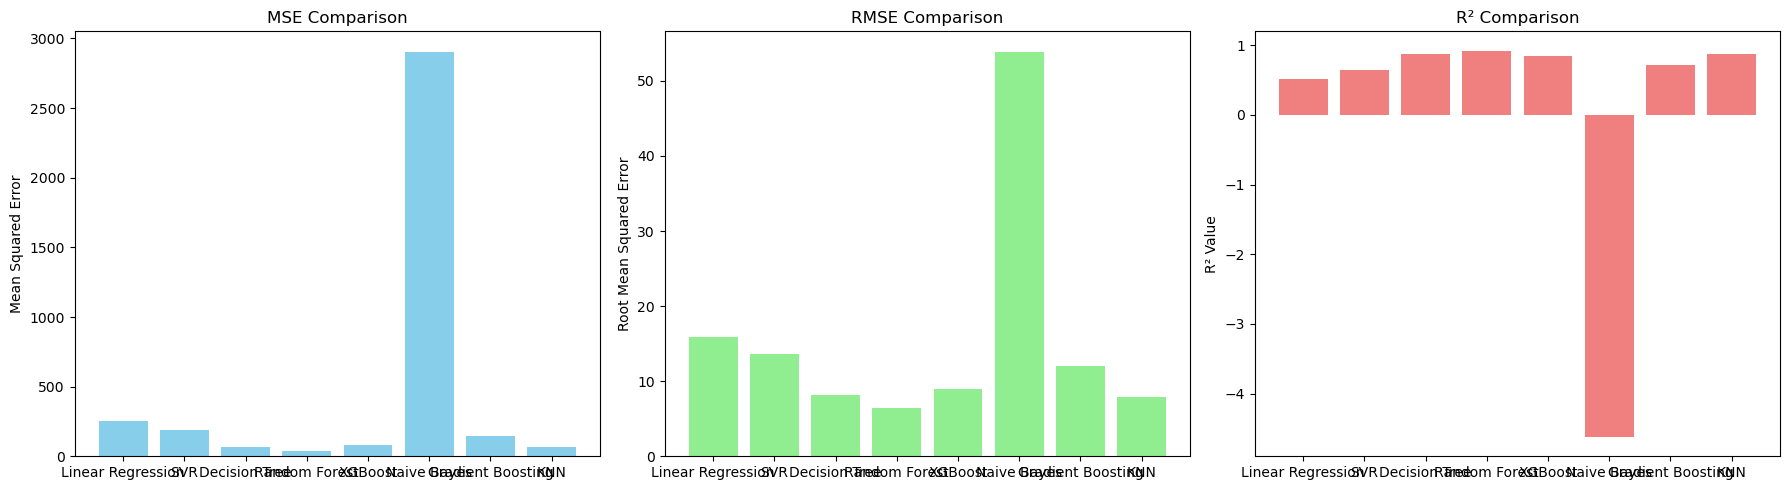

In [5]:
# Plot the results for MSE, RMSE, and R2 for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MSE plot
axes[0].bar(results_df['Model'], results_df['MSE'], color='skyblue')
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('Mean Squared Error')

# RMSE plot
axes[1].bar(results_df['Model'], results_df['RMSE'], color='lightgreen')
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('Root Mean Squared Error')

# R2 plot
axes[2].bar(results_df['Model'], results_df['R2'], color='lightcoral')
axes[2].set_title('R² Comparison')
axes[2].set_ylabel('R² Value')

plt.tight_layout()
plt.show()

## Conclusion

### Linear Regression:
- **MSE**: 251.68  
- **RMSE**: 15.86  
- **R²**: 0.51

Linear Regression shows 51% of the variance in terms of gym crowdedness, which makes it in average (neither of this model is good or bad), however it has a high MSE (251.68) and RMSE (15.86) which doesnt produce precise prediction as it should be in this analysis.

### SVR (Support Vector Regression):
- **MSE**: 186.00  
- **RMSE**: 13.64  
- **R²**: 0.64  

SVR or the Support Vector Regression shows 64% of the variance in terms of gym crowdedness, which makes it better than the Linear Regression, however it also has a slightly high MSE (186.00) and RMSE (13.64) which also doesnt produce precise prediction as it should be in this analysis.

### Decision Tree:
- **MSE**: 66.69  
- **RMSE**: 8.17  
- **R²**: 0.87
  
Decision Tree shows 87% of the variance in terms of gym crowdedness, which can be included to be one of the most performing models in this analysis, additionaly, it has a low MSE (66.69) and RMSE (8.17) which gives the analysis an accurate predictions.

### Random Forest:
- **MSE**: 40.98  
- **RMSE**: 40.98  
- **R²**: 0.92

Random Forest shows 92% of the variance in terms of gym crowdedness, which is the best among the other models that has been tested, it also has a low MSE (40.98) and RMSE (40.98) which gives the analysis the most accurate predictions.

### XGBoost:
- **MSE**: 80.59  
- **RMSE**: 8.98  
- **R²**: 0.84  

XGBoost shows 84% of the variance in terms of gym crowdedness, it is also one of the most performing models in this analysis but not as good as the random forest and decision tree, additionaly, it has also a low MSE (80.59) and RMSE (8.98) which gives the analysis an accurate predictions.

### Naive Bayes:
- **MSE**: 2905.92  
- **RMSE**: 53.91  
- **R²**: -4.62  

Naive Bayes shows -4.62% of the variance in terms of gym crowdedness, which performs very poorly because of its negative variance, it also has a relatively high MSE (2905.92) and RMSE (53.91) which also doesnt produce precise prediction as it should be in this analysis. Basically, Naive Bayes should not be in option.

### Gradient Boosting:
- **MSE**: 145.08  
- **RMSE**: 12.04  
- **R²**: 0.72

Gradient Boosting shows 72% of the variance in terms of gym crowdedness, which makes the model performs also better and should be one of the options in picking a model, it also has an average level of MSE (145.08) and RMSE (12.04) which moderately produce precise prediction as it should be in this analysis.

### K-Nearest Neighbors (KNN):
- **MSE**: 63.11  
- **RMSE**: 7.94  
- **R²**: 0.88

K-Nearest Neighbors (KNN) shows 88% of the variance in terms of gym crowdedness, which can be also included to be one of the most performing models in this analysis, additionaly, it has a low MSE (63.11) and RMSE (7.94) which gives the analysis an accurate predictions and better to the decision tree model.


### **OVERALL:**
Using the different MSE, RMSE, and R² of the different machine learning algorithm, we determine which algorithm is the optimize or predicts the best. Based on the results given above, Random Forest is the most performing model in the analysis, with a high R² and low MSE and RMSE scores, followed by the decision tree, KNN, SVR, Gradiend boosting, XGBoost, and lastly the model that performs poorly is the Naive Bayes which produces negative R² and with a relatively high MSE and RMSE
er performance.
cal events could improve predictions.



In [7]:
# Load the dataset
df = pd.read_csv('data.csv')

# Ensure 'date' column is parsed correctly
df['date'] = pd.to_datetime(df['date'], utc=True)

# Feature engineering: Extract day of the week, hour, and other relevant features if needed
df['day_of_week'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

# Selecting features and target
features = ['day_of_week', 'is_weekend', 'is_holiday', 'temperature', 'hour']
X = df[features]
y = df['number_people']  # Target variable: crowd level

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting crowd levels across various times (e.g., every hour of a weekday and weekend)
# Creating a new DataFrame to evaluate optimal times
evaluation_times = pd.DataFrame({
    'day_of_week': np.tile(np.arange(7), 24),
    'hour': np.repeat(np.arange(24), 7),
    'is_weekend': np.tile([0, 0, 0, 0, 0, 1, 1], 24),  # Assuming Sat/Sun are weekends
    'is_holiday': 0,  # Assume no holidays for simplicity
    'temperature': df['temperature'].mean()  # Average temperature for simplicity
})

# Predicting crowd levels for each evaluation time
evaluation_times['predicted_crowd'] = rf_model.predict(evaluation_times[features])

# Finding the optimal (least crowded) gym times
optimal_times = evaluation_times.sort_values(by='predicted_crowd')

# Displaying the least crowded times
optimal_times

,day_of_week,hour,is_weekend,is_holiday,temperature,predicted_crowd
75,5,10,1,0,58.557108,0.005333
90,6,12,1,0,58.557108,0.008000
61,5,8,1,0,58.557108,0.019000
82,5,11,1,0,58.557108,0.019107
83,6,11,1,0,58.557108,0.045744
...,...,...,...,...,...,...
11,4,1,0,0,58.557108,63.374127
2,2,0,0,0,58.557108,66.859214
161,0,23,0,0,58.557108,67.626559
164,3,23,0,0,58.557108,71.599298



Based on the results, day of the week and hours of the day influence the gym crowdedness. Monday to Fridays which are weekdays tend to show high crowd level and the time where it is optimal is 6 to 8am and 8pm onwards. Weekend are the days where it shows low crowd level mostly all of the time. Holiday and the temperature doesnt influence the gym crowdedness.


